<a href="https://colab.research.google.com/github/Nick-Azzarano/Machine-Learning-Practice/blob/main/Spring2025/Homeworks/HW10_Azzarano_Nick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nick Azzarano
<br/>
CSCI 335
<br/>
Anton Selitskiy
<br/>
April 14, 2025

# Homework 10

In this homework, you will implement NN using PyTorch and investigate different activation functions, batch sizes, and learning rates. Use [Lecture code](https://github.com/anton-selitskiy/RIT_ML/blob/main/2025_spring/Week11_MLP/ML21.ipynb) as refference.

Use load_planar_dataset function from the previous homework to create the data.

In [258]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [259]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros(m, dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius. 4 corresponds to the number of petals
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    return X, Y

In [260]:
x, y = load_planar_dataset()  #make_moons(n_samples=200, noise=0.1)  make_circles(n_samples=200, noise=0.1)
y = y.reshape(-1,1)
x.shape, y.shape

((400, 2), (400, 1))

In [261]:
x[:,0]

array([ 1.20444229e+00,  1.58709904e-01,  9.52471960e-02,  3.49178475e-01,
        6.94150378e-01,  1.62065038e+00,  1.53856225e+00,  3.63085641e-02,
        4.74591109e-01,  1.65695828e-01,  1.66446249e+00,  8.40285720e-01,
        2.61695163e-01,  2.31614896e-01,  1.58013020e+00,  6.35509950e-03,
        6.80610419e-01,  1.21400432e-01,  1.13281261e+00,  1.61505892e+00,
        1.66454441e-01,  1.72438241e+00,  1.88667246e+00,  1.72327227e+00,
        1.54661332e+00,  9.84590400e-01,  1.45313345e+00,  7.49043388e-01,
        1.45048341e+00,  1.64287865e+00,  1.28141487e+00,  1.59574104e+00,
        1.46298294e+00,  1.46629048e+00,  1.54348961e+00,  1.57013416e+00,
        1.22995404e+00,  1.31142345e+00, -1.99364553e+00,  3.94564752e-01,
        1.51715449e+00,  1.69169139e+00,  1.74186686e+00, -2.91373382e+00,
        7.52150898e-01,  1.68537303e+00,  3.71160238e-01, -3.73033884e+00,
        3.52484080e-01, -1.48694206e+00, -7.45290416e-01,  5.63807442e-01,
        1.27093179e+00,  

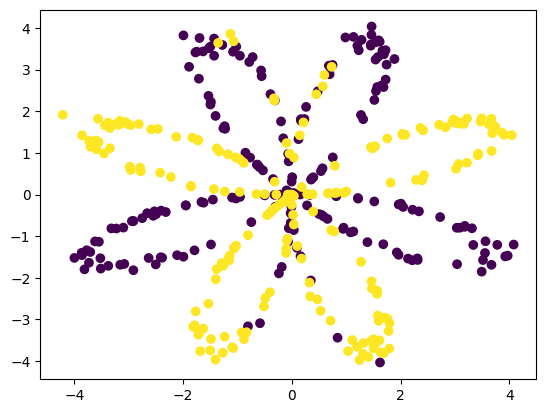

In [262]:
plt.scatter(x[:,0], x[:,1], c=y)

##1. (2 pt) Create Dataset object.

In [263]:
class MyData(Dataset):
    def __init__(self, x, y):
        """
        Initialize the dataset with features (x) and labels (y).
        """
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        """
        Return the number of samples in the dataset.
        """
        return len(self.x)

    def __getitem__(self, idx):
        """
        Retrieve a single sample (features and label) by index.
        """
        return self.x[idx], self.y[idx]

In [264]:
data = MyData(x,y)

In [265]:
data.__len__()

400

In [266]:
data.__getitem__(0)

(tensor([1.2044, 3.5761]), tensor([0.]))

## 2. (1 pt) Create DataLoader object.

In [267]:
data_loader = DataLoader(data, batch_size=16, shuffle=True)

In [268]:
for x_batch, y_batch in data_loader:
  print(x_batch.shape, y_batch.shape)

torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([16, 2]) torch.Size([16, 1])


## 3. (3 pt) Construct the model
$$
hidden\_1 \to activation\_1 \to hidden\_2 \to activation\_2  
$$
Use `Sigmoid` function as activation on this step.

In [269]:
import torch.nn as nn

In [270]:
# class MyModel(nn.Module):
#   # The constructor is what layers are within your model
#   def __init__(self, input_size, hidden_1_size, hidden_2_size):
#     super().__init__()
#     self.fc1 = nn.Linear(input_size, hidden_1_size) #fc stands for "fully connected", it fans out to hidden_size number of nodes
#     self.activation = nn.Sigmoid() # Activation function
#     self.fc2 = nn.Linear(hidden_1_size, hidden_2_size) # create a second hidden layer
#     self.output = nn.Linear(hidden_2_size, 1) # we map our hidden_size back down to 1.

#   #
#   def forward(self, x_batch):
#     o = self.fc1(x_batch)
#     o = self.activation(o)
#     o = self.fc2(o)
#     o = self.activation(o)
#     o = self.output(o)
#     return o

In [271]:
class MyModel(nn.Module):
    def __init__(self, input_size, hidden_1_size, hidden_2_size, activation_func):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_1_size)
        self.activation = activation_func
        self.fc2 = nn.Linear(hidden_1_size, hidden_2_size)
        self.output = nn.Linear(hidden_2_size, 1)
        self.output_activation = activation_func  # Add Sigmoid for the output layer

    def forward(self, x_batch):
        o = self.fc1(x_batch)
        o = self.activation(o)
        o = self.fc2(o)
        o = self.activation(o)
        o = self.output(o)
        o = self.output_activation(o)  # Apply Sigmoid here
        return o

In [272]:
input_size = 2
hidden_1_size = 4
hidden_2_size = 3
activation_func = nn.Sigmoid()
my_model = MyModel(input_size, hidden_1_size, hidden_2_size, activation_func)

## 4. (3 pt) Write the training loop. Use Binary cross-entropy loss. Also, you can use tqdm function to see the training progress. You can start with learning rate 0.01.

In [273]:
from torch.nn import BCELoss
from tqdm import tqdm

In [274]:
# Initialize the loss function
loss_fn = BCELoss()

In [275]:
# Initialize the optimizer
from torch.optim import Adam
optimizer = Adam(my_model.parameters(), lr=0.01)

In [276]:
for batch in data_loader:
  x_batch, y_batch = batch
  print(x_batch.shape, y_batch.shape)

torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([16, 2]) torch.Size([16, 1])


In [277]:
# Initialize a list to store the loss for each epoch
loss_history = []

# Training loop
epochs = 100  # Number of epochs
for epoch in range(epochs):
    epoch_loss = 0.0
    for batch in tqdm(data_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        x_batch, y_batch = batch

        # Forward pass
        predictions = my_model.forward(x_batch)
        loss = loss_fn(predictions, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate loss
        epoch_loss += loss.item()

    # Store the average loss for this epoch
    loss_history.append(epoch_loss / len(data_loader))
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

Epoch 1/100: 100%|██████████| 13/13 [00:00<00:00, 509.42it/s]


Epoch 1, Loss: 9.5956


Epoch 2/100: 100%|██████████| 13/13 [00:00<00:00, 476.56it/s]


Epoch 2, Loss: 9.1166


Epoch 3/100: 100%|██████████| 13/13 [00:00<00:00, 597.96it/s]


Epoch 3, Loss: 8.9814


Epoch 4/100: 100%|██████████| 13/13 [00:00<00:00, 552.51it/s]


Epoch 4, Loss: 8.9559


Epoch 5/100: 100%|██████████| 13/13 [00:00<00:00, 581.21it/s]


Epoch 5, Loss: 8.9278


Epoch 6/100: 100%|██████████| 13/13 [00:00<00:00, 589.91it/s]


Epoch 6, Loss: 8.9290


Epoch 7/100: 100%|██████████| 13/13 [00:00<00:00, 630.86it/s]


Epoch 7, Loss: 8.9030


Epoch 8/100: 100%|██████████| 13/13 [00:00<00:00, 510.25it/s]


Epoch 8, Loss: 8.8965


Epoch 9/100: 100%|██████████| 13/13 [00:00<00:00, 563.24it/s]


Epoch 9, Loss: 8.8699


Epoch 10/100: 100%|██████████| 13/13 [00:00<00:00, 512.24it/s]


Epoch 10, Loss: 8.8309


Epoch 11/100: 100%|██████████| 13/13 [00:00<00:00, 552.03it/s]


Epoch 11, Loss: 8.8182


Epoch 12/100: 100%|██████████| 13/13 [00:00<00:00, 541.55it/s]


Epoch 12, Loss: 8.7847


Epoch 13/100: 100%|██████████| 13/13 [00:00<00:00, 595.21it/s]


Epoch 13, Loss: 8.7401


Epoch 14/100: 100%|██████████| 13/13 [00:00<00:00, 563.18it/s]


Epoch 14, Loss: 8.7128


Epoch 15/100: 100%|██████████| 13/13 [00:00<00:00, 592.67it/s]


Epoch 15, Loss: 8.6535


Epoch 16/100: 100%|██████████| 13/13 [00:00<00:00, 579.72it/s]


Epoch 16, Loss: 8.6173


Epoch 17/100: 100%|██████████| 13/13 [00:00<00:00, 552.81it/s]


Epoch 17, Loss: 8.5693


Epoch 18/100: 100%|██████████| 13/13 [00:00<00:00, 592.27it/s]


Epoch 18, Loss: 8.5049


Epoch 19/100: 100%|██████████| 13/13 [00:00<00:00, 341.05it/s]


Epoch 19, Loss: 8.4723


Epoch 20/100: 100%|██████████| 13/13 [00:00<00:00, 495.74it/s]


Epoch 20, Loss: 8.4526


Epoch 21/100: 100%|██████████| 13/13 [00:00<00:00, 582.58it/s]


Epoch 21, Loss: 8.3839


Epoch 22/100: 100%|██████████| 13/13 [00:00<00:00, 488.16it/s]


Epoch 22, Loss: 8.3221


Epoch 23/100: 100%|██████████| 13/13 [00:00<00:00, 579.50it/s]


Epoch 23, Loss: 8.2840


Epoch 24/100: 100%|██████████| 13/13 [00:00<00:00, 557.50it/s]


Epoch 24, Loss: 8.2496


Epoch 25/100: 100%|██████████| 13/13 [00:00<00:00, 543.68it/s]


Epoch 25, Loss: 8.0821


Epoch 26/100: 100%|██████████| 13/13 [00:00<00:00, 547.66it/s]


Epoch 26, Loss: 7.9499


Epoch 27/100: 100%|██████████| 13/13 [00:00<00:00, 559.53it/s]


Epoch 27, Loss: 7.8454


Epoch 28/100: 100%|██████████| 13/13 [00:00<00:00, 602.22it/s]


Epoch 28, Loss: 7.7325


Epoch 29/100: 100%|██████████| 13/13 [00:00<00:00, 578.49it/s]


Epoch 29, Loss: 7.5291


Epoch 30/100: 100%|██████████| 13/13 [00:00<00:00, 442.57it/s]


Epoch 30, Loss: 7.3352


Epoch 31/100: 100%|██████████| 13/13 [00:00<00:00, 482.01it/s]


Epoch 31, Loss: 7.0647


Epoch 32/100: 100%|██████████| 13/13 [00:00<00:00, 575.52it/s]


Epoch 32, Loss: 6.9371


Epoch 33/100: 100%|██████████| 13/13 [00:00<00:00, 534.99it/s]


Epoch 33, Loss: 6.6533


Epoch 34/100: 100%|██████████| 13/13 [00:00<00:00, 610.21it/s]


Epoch 34, Loss: 6.4310


Epoch 35/100: 100%|██████████| 13/13 [00:00<00:00, 568.06it/s]


Epoch 35, Loss: 6.2627


Epoch 36/100: 100%|██████████| 13/13 [00:00<00:00, 495.28it/s]


Epoch 36, Loss: 6.1302


Epoch 37/100: 100%|██████████| 13/13 [00:00<00:00, 599.07it/s]


Epoch 37, Loss: 5.8700


Epoch 38/100: 100%|██████████| 13/13 [00:00<00:00, 541.34it/s]


Epoch 38, Loss: 5.8275


Epoch 39/100: 100%|██████████| 13/13 [00:00<00:00, 533.55it/s]


Epoch 39, Loss: 5.5601


Epoch 40/100: 100%|██████████| 13/13 [00:00<00:00, 574.73it/s]


Epoch 40, Loss: 5.4939


Epoch 41/100: 100%|██████████| 13/13 [00:00<00:00, 541.11it/s]


Epoch 41, Loss: 5.3945


Epoch 42/100: 100%|██████████| 13/13 [00:00<00:00, 596.77it/s]


Epoch 42, Loss: 5.3345


Epoch 43/100: 100%|██████████| 13/13 [00:00<00:00, 531.50it/s]


Epoch 43, Loss: 5.2285


Epoch 44/100: 100%|██████████| 13/13 [00:00<00:00, 429.22it/s]


Epoch 44, Loss: 5.0378


Epoch 45/100: 100%|██████████| 13/13 [00:00<00:00, 538.66it/s]


Epoch 45, Loss: 5.0975


Epoch 46/100: 100%|██████████| 13/13 [00:00<00:00, 515.55it/s]


Epoch 46, Loss: 5.0378


Epoch 47/100: 100%|██████████| 13/13 [00:00<00:00, 499.18it/s]


Epoch 47, Loss: 4.8550


Epoch 48/100: 100%|██████████| 13/13 [00:00<00:00, 489.03it/s]


Epoch 48, Loss: 4.8521


Epoch 49/100: 100%|██████████| 13/13 [00:00<00:00, 577.45it/s]


Epoch 49, Loss: 4.7318


Epoch 50/100: 100%|██████████| 13/13 [00:00<00:00, 514.44it/s]


Epoch 50, Loss: 4.7086


Epoch 51/100: 100%|██████████| 13/13 [00:00<00:00, 495.26it/s]


Epoch 51, Loss: 4.8229


Epoch 52/100: 100%|██████████| 13/13 [00:00<00:00, 532.44it/s]


Epoch 52, Loss: 4.6400


Epoch 53/100: 100%|██████████| 13/13 [00:00<00:00, 518.08it/s]


Epoch 53, Loss: 4.7388


Epoch 54/100: 100%|██████████| 13/13 [00:00<00:00, 380.78it/s]


Epoch 54, Loss: 4.6222


Epoch 55/100: 100%|██████████| 13/13 [00:00<00:00, 564.46it/s]


Epoch 55, Loss: 4.6866


Epoch 56/100: 100%|██████████| 13/13 [00:00<00:00, 497.83it/s]


Epoch 56, Loss: 4.6759


Epoch 57/100: 100%|██████████| 13/13 [00:00<00:00, 536.58it/s]


Epoch 57, Loss: 4.4734


Epoch 58/100: 100%|██████████| 13/13 [00:00<00:00, 585.40it/s]


Epoch 58, Loss: 4.5407


Epoch 59/100: 100%|██████████| 13/13 [00:00<00:00, 539.30it/s]


Epoch 59, Loss: 4.4877


Epoch 60/100: 100%|██████████| 13/13 [00:00<00:00, 531.39it/s]


Epoch 60, Loss: 4.4095


Epoch 61/100: 100%|██████████| 13/13 [00:00<00:00, 523.01it/s]


Epoch 61, Loss: 4.5014


Epoch 62/100: 100%|██████████| 13/13 [00:00<00:00, 562.56it/s]


Epoch 62, Loss: 4.4051


Epoch 63/100: 100%|██████████| 13/13 [00:00<00:00, 539.29it/s]


Epoch 63, Loss: 4.5090


Epoch 64/100: 100%|██████████| 13/13 [00:00<00:00, 576.04it/s]


Epoch 64, Loss: 4.3235


Epoch 65/100: 100%|██████████| 13/13 [00:00<00:00, 427.91it/s]


Epoch 65, Loss: 4.3553


Epoch 66/100: 100%|██████████| 13/13 [00:00<00:00, 465.77it/s]


Epoch 66, Loss: 4.4868


Epoch 67/100: 100%|██████████| 13/13 [00:00<00:00, 561.64it/s]


Epoch 67, Loss: 4.4487


Epoch 68/100: 100%|██████████| 13/13 [00:00<00:00, 519.89it/s]


Epoch 68, Loss: 4.3748


Epoch 69/100: 100%|██████████| 13/13 [00:00<00:00, 550.44it/s]


Epoch 69, Loss: 4.3925


Epoch 70/100: 100%|██████████| 13/13 [00:00<00:00, 485.37it/s]


Epoch 70, Loss: 4.4094


Epoch 71/100: 100%|██████████| 13/13 [00:00<00:00, 493.33it/s]


Epoch 71, Loss: 4.4256


Epoch 72/100: 100%|██████████| 13/13 [00:00<00:00, 525.86it/s]


Epoch 72, Loss: 4.2708


Epoch 73/100: 100%|██████████| 13/13 [00:00<00:00, 483.61it/s]


Epoch 73, Loss: 4.3707


Epoch 74/100: 100%|██████████| 13/13 [00:00<00:00, 539.63it/s]


Epoch 74, Loss: 4.4235


Epoch 75/100: 100%|██████████| 13/13 [00:00<00:00, 441.94it/s]


Epoch 75, Loss: 4.3082


Epoch 76/100: 100%|██████████| 13/13 [00:00<00:00, 413.64it/s]


Epoch 76, Loss: 4.3434


Epoch 77/100: 100%|██████████| 13/13 [00:00<00:00, 515.19it/s]


Epoch 77, Loss: 4.2179


Epoch 78/100: 100%|██████████| 13/13 [00:00<00:00, 451.75it/s]


Epoch 78, Loss: 4.4139


Epoch 79/100: 100%|██████████| 13/13 [00:00<00:00, 484.21it/s]


Epoch 79, Loss: 4.2239


Epoch 80/100: 100%|██████████| 13/13 [00:00<00:00, 510.69it/s]


Epoch 80, Loss: 4.2369


Epoch 81/100: 100%|██████████| 13/13 [00:00<00:00, 518.83it/s]


Epoch 81, Loss: 4.2313


Epoch 82/100: 100%|██████████| 13/13 [00:00<00:00, 470.86it/s]


Epoch 82, Loss: 4.3549


Epoch 83/100: 100%|██████████| 13/13 [00:00<00:00, 472.56it/s]


Epoch 83, Loss: 4.2266


Epoch 84/100: 100%|██████████| 13/13 [00:00<00:00, 520.26it/s]


Epoch 84, Loss: 4.1670


Epoch 85/100: 100%|██████████| 13/13 [00:00<00:00, 531.62it/s]


Epoch 85, Loss: 4.1897


Epoch 86/100: 100%|██████████| 13/13 [00:00<00:00, 528.23it/s]


Epoch 86, Loss: 4.2135


Epoch 87/100: 100%|██████████| 13/13 [00:00<00:00, 537.02it/s]


Epoch 87, Loss: 4.1408


Epoch 88/100: 100%|██████████| 13/13 [00:00<00:00, 372.74it/s]


Epoch 88, Loss: 4.1846


Epoch 89/100: 100%|██████████| 13/13 [00:00<00:00, 508.47it/s]


Epoch 89, Loss: 4.2236


Epoch 90/100: 100%|██████████| 13/13 [00:00<00:00, 435.03it/s]


Epoch 90, Loss: 4.1789


Epoch 91/100: 100%|██████████| 13/13 [00:00<00:00, 549.88it/s]


Epoch 91, Loss: 4.1699


Epoch 92/100: 100%|██████████| 13/13 [00:00<00:00, 524.28it/s]


Epoch 92, Loss: 4.0841


Epoch 93/100: 100%|██████████| 13/13 [00:00<00:00, 568.00it/s]


Epoch 93, Loss: 4.2636


Epoch 94/100: 100%|██████████| 13/13 [00:00<00:00, 493.41it/s]


Epoch 94, Loss: 4.0639


Epoch 95/100: 100%|██████████| 13/13 [00:00<00:00, 479.86it/s]


Epoch 95, Loss: 4.0983


Epoch 96/100: 100%|██████████| 13/13 [00:00<00:00, 559.81it/s]


Epoch 96, Loss: 4.3170


Epoch 97/100: 100%|██████████| 13/13 [00:00<00:00, 547.73it/s]


Epoch 97, Loss: 4.2068


Epoch 98/100: 100%|██████████| 13/13 [00:00<00:00, 497.47it/s]


Epoch 98, Loss: 4.1543


Epoch 99/100: 100%|██████████| 13/13 [00:00<00:00, 413.81it/s]


Epoch 99, Loss: 4.1391


Epoch 100/100: 100%|██████████| 13/13 [00:00<00:00, 542.32it/s]

Epoch 100, Loss: 4.1880


## 5. (2 pt) Write the prediction class to use it in plot_decision_regions function.

In [278]:
class MyPrediction:
    def __init__(self, model):
        """
        Initialize the Prediction class with the trained model.
        """
        self.model = model

    def predict(self, x):
        """
        Predict the class labels for the input data.
        Args:
            x (torch.Tensor or np.ndarray): Input data of shape (n_samples, n_features).
        Returns:
            np.ndarray: Predicted class labels (0 or 1) of shape (n_samples,).
        """
        if isinstance(x, np.ndarray):
            x = torch.tensor(x, dtype=torch.float32)  # Convert to torch.Tensor if input is a NumPy array

        with torch.no_grad():  # Disable gradient computation for inference
            probabilities = self.model(x)  # Get probabilities from the model
            predictions = (probabilities >= 0.5).float()  # Convert probabilities to binary labels (0 or 1)

        return predictions.numpy().flatten()  # Convert to NumPy array and flatten to 1D

In [279]:
# Initialize the Prediction class with the trained model
my_predictor = Prediction(my_model)

## 6. (2 pt) Plot the loss and decision boundary after the training.

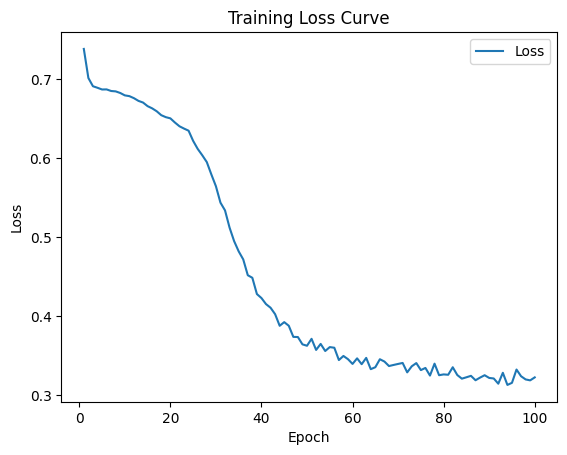

In [280]:
# Plot the loss curve
plt.plot(range(1, epochs + 1), loss_history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

In [281]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

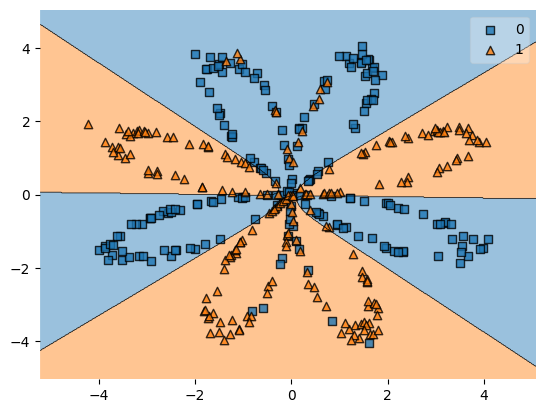

In [282]:
plot_decision_regions(x,y.reshape(-1,),my_predictor)

## 7. Experiments 1: Try LeakyReLU as `activation_1` with the size of `hidden_1` = 4, 5, and 10. You can reuse the same model without copying it.

In [ ]:
activation_func = nn.LeakyReLU()
input_size = 2
hidden_1_size = 4
hidden_2_size = 3
my_model_leakyReLU = MyModel(input_size, hidden_1_size, hidden_2_size, activation_func)

## 8. (3 pt) Comment on the number of the straight lines with respect to the size of the hidden layer.

## 9. Experiments 2: with the `hidden_1` layer of the size 4 try Sigmoind, ReLU, LeakyReLU, ELU, and SiLU as `activation_1`. Do this for batch sizes 4 and 50.

## 10. (4 pt) Comment on the shape of the decision boundaries with respect to the activation function and the batch size. Did you adjust the learning rate? Did you try to start with small learning rate like 0.001 instead of 0.01 and if so, which worked better?